In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score , confusion_matrix , roc_auc_score , roc_curve
# from ydata_profiling import ProfileReport
# Load scikit's random forest classifier library
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, precision_score
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model, tree, ensemble
from sklearn.svm import SVC
from xgboost import XGBClassifier
import warnings
warnings.filterwarnings("ignore")


In [2]:
df = pd.read_csv("heart_failure_clinical_records1.csv")
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [3]:
df.shape

(918, 12)

In [4]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [5]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [6]:
df_cols = df.columns
df_cols

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

In [7]:
df.notnull().sum()

Age               918
Sex               918
ChestPainType     918
RestingBP         918
Cholesterol       918
FastingBS         918
RestingECG        918
MaxHR             918
ExerciseAngina    918
Oldpeak           918
ST_Slope          918
HeartDisease      918
dtype: int64

In [8]:
for column in df.select_dtypes(include=['object']).columns:
    num_unique_values = df[column].nunique()
    print(f"Number of distinct values in {column}: {num_unique_values}")

Number of distinct values in Sex: 2
Number of distinct values in ChestPainType: 4
Number of distinct values in RestingECG: 3
Number of distinct values in ExerciseAngina: 2
Number of distinct values in ST_Slope: 3


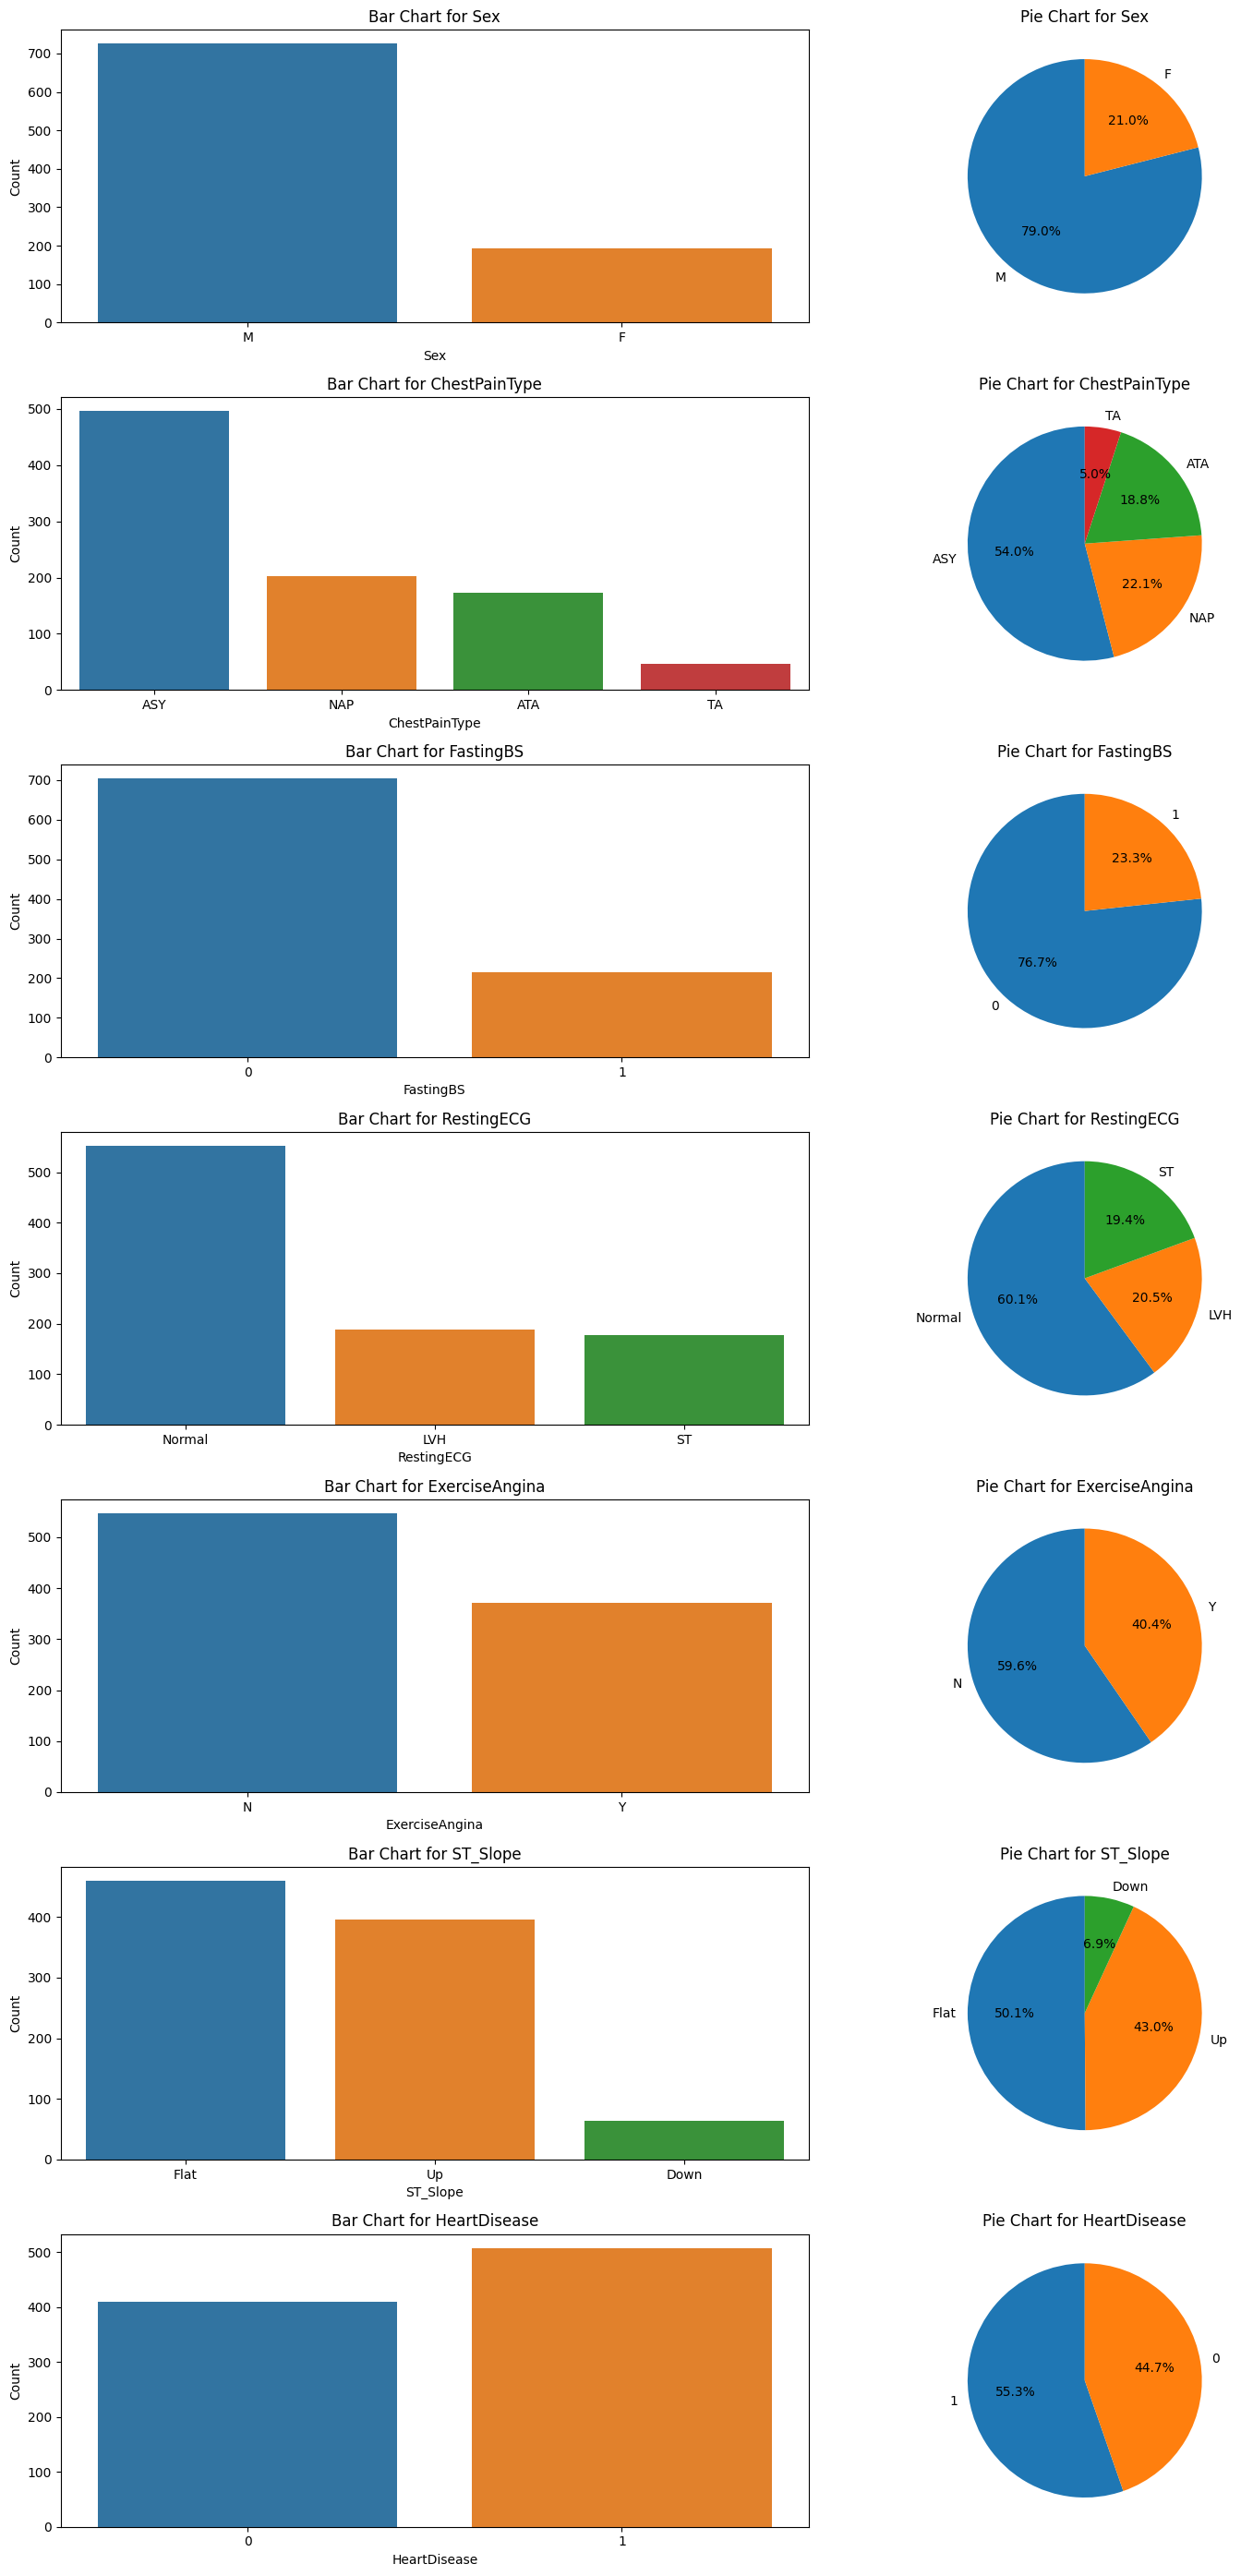

In [9]:
# df_cat = df[[obj for obj in df.select_dtypes(include=['object']).columns]]

df_cat = df[[obj for obj in df.columns if df[obj].dtype =='object' or obj == 'HeartDisease' or obj == 'FastingBS']]


df_cat

fig, axes = plt.subplots(df_cat.shape[1], 2, figsize=(16, 4 * df_cat.shape[1]))
for i, column in enumerate(df_cat.columns):
    value_counts = df_cat[column].value_counts()
    count = value_counts.values
    labels = value_counts.index

    # Bar chart
    sns.barplot(x=labels, y=count, orient='v', ax=axes[i, 0])
    sns.barplot()
    axes[i, 0].set_title(f'Bar Chart for {column}')
    axes[i, 0].set_xlabel(column)
    axes[i, 0].set_ylabel('Count')

    # Pie chart
    axes[i, 1].pie(count, labels=labels, autopct='%1.1f%%', startangle=90)
    axes[i, 1].set_title(f'Pie Chart for {column}')

fig.tight_layout()
plt.show()

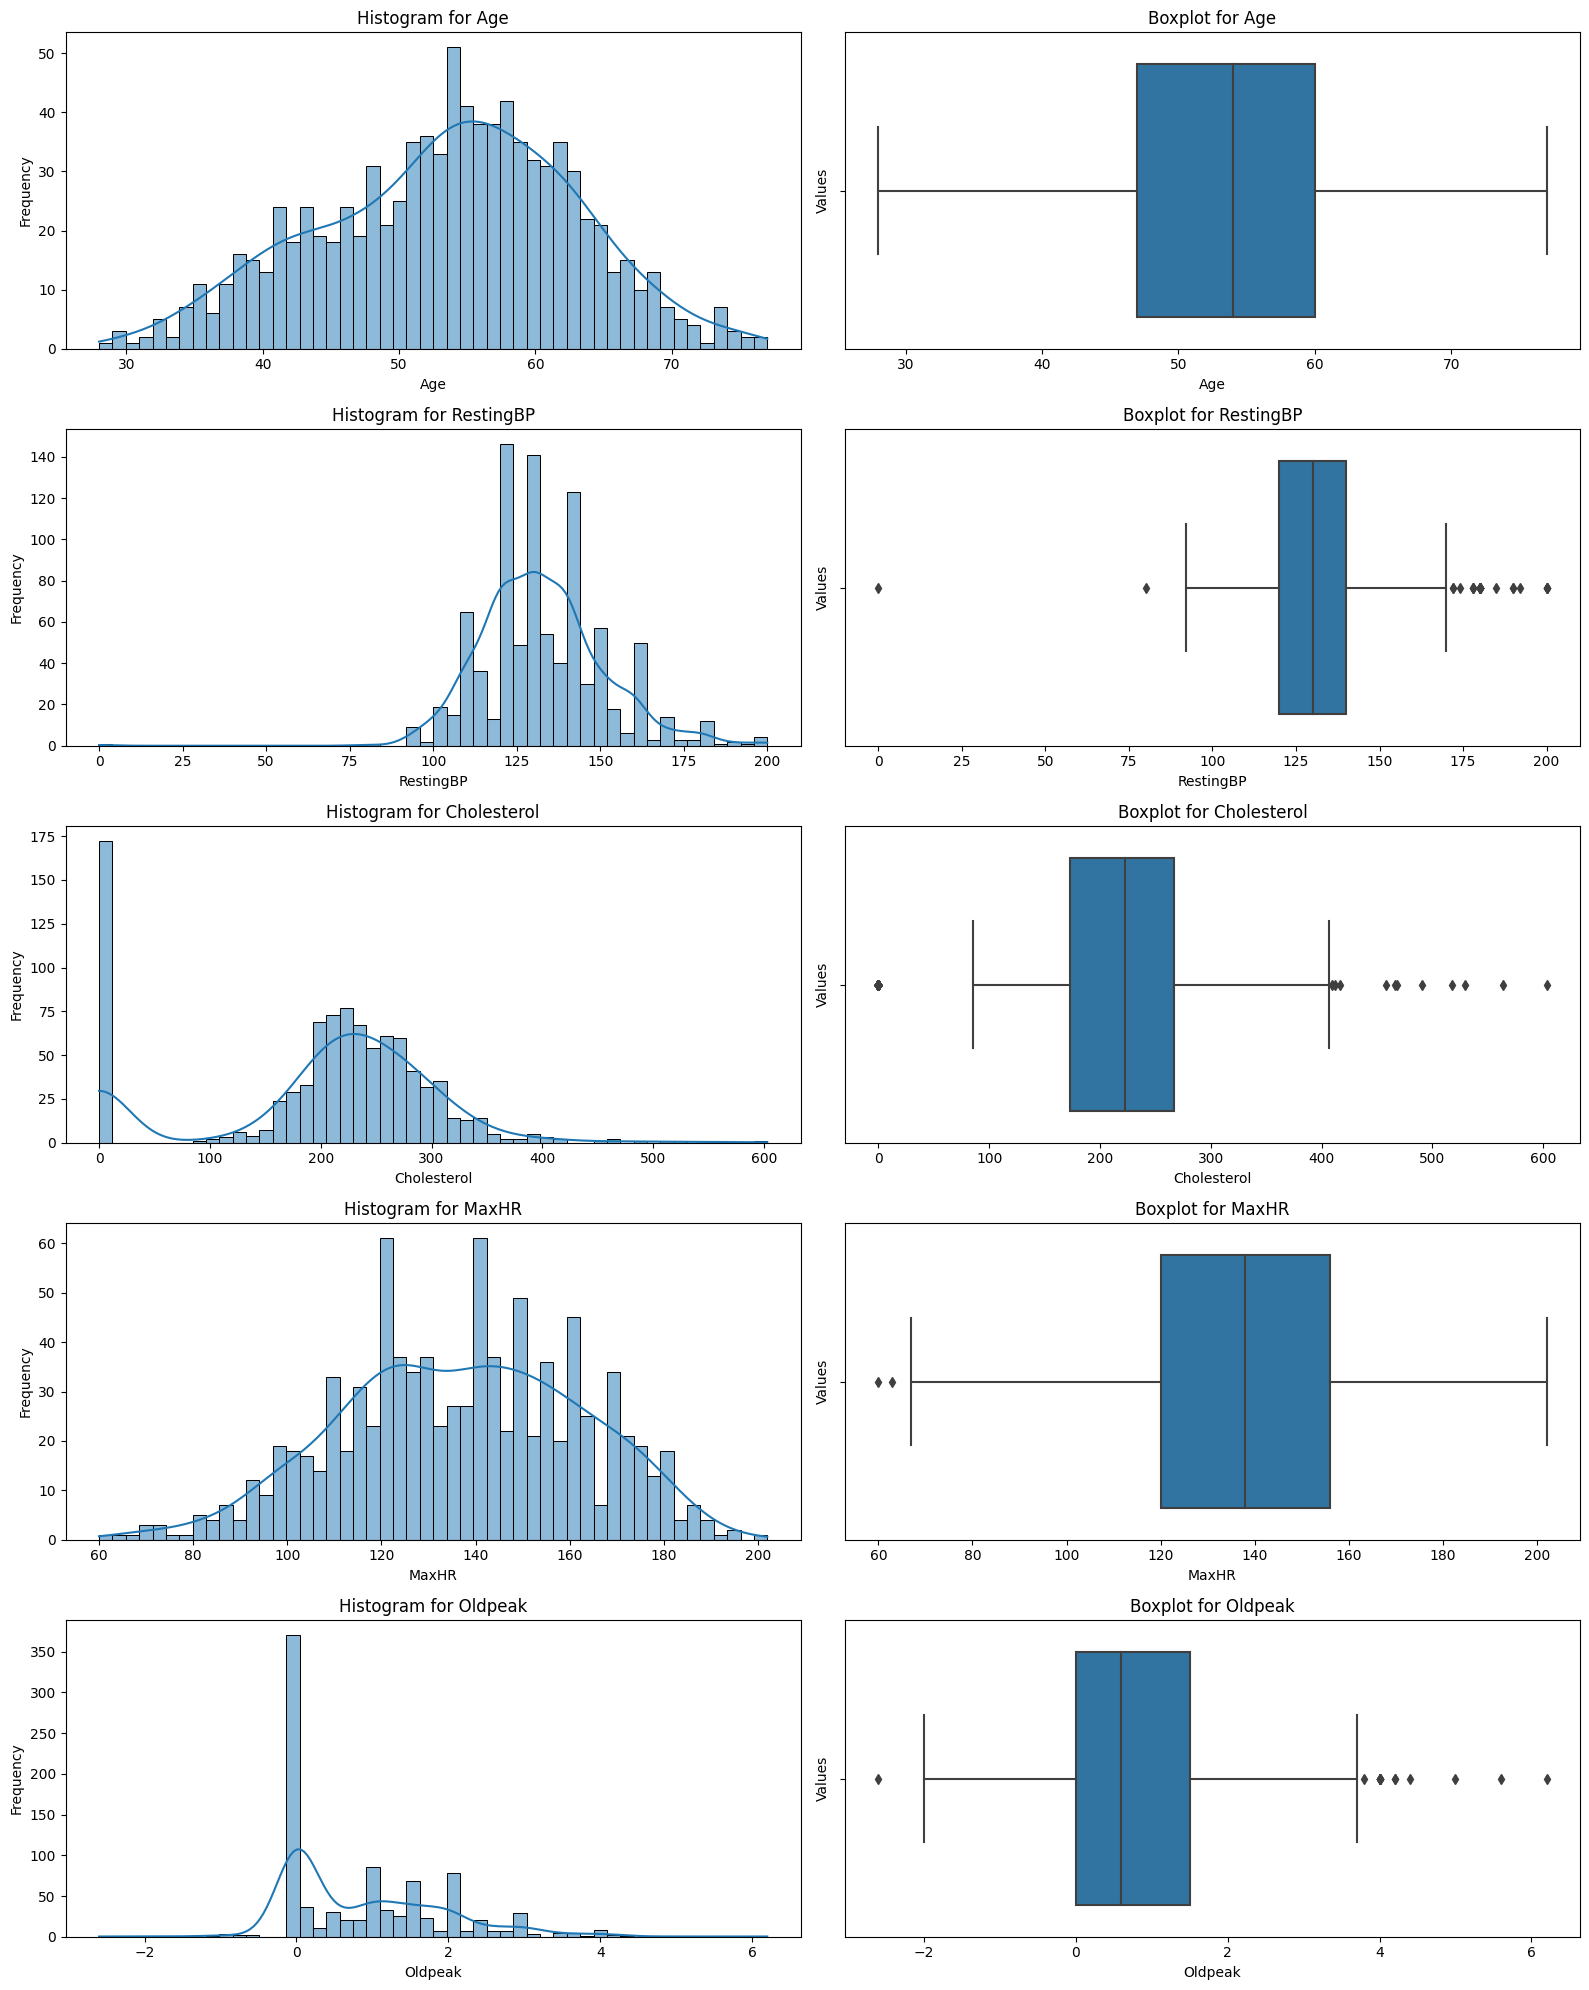

In [10]:
df_num = df[[obj for obj in df.select_dtypes(exclude=['object']).columns 
             if obj != 'HeartDisease' and obj != 'FastingBS' ]]
df_num


fig, axes = plt.subplots(df_num.shape[1], 2, figsize=(16, 4 * df_num.shape[1]))

for i, column in enumerate(df_num.columns):
    # Histogram
    sns.histplot(x=df_num[column], bins=50, kde=True, ax=axes[i, 0])
    axes[i, 0].set_title(f'Histogram for {column}')
    axes[i, 0].set_xlabel(column)
    axes[i, 0].set_ylabel('Frequency')

    # Boxplot
    sns.boxplot(x=df_num[column], ax=axes[i, 1])
    axes[i, 1].set_title(f'Boxplot for {column}')
    axes[i, 1].set_xlabel(column)
    axes[i, 1].set_ylabel('Values')

fig.tight_layout()
plt.show()

In [11]:
def handle_outliers(column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    low_bound = Q1 - 1.5 * IQR
    high_bound = Q3 + 1.5 * IQR
    return df[column].clip(lower=low_bound, upper=high_bound)

for column in df_num:
    df[column] = handle_outliers(column)


In [12]:
df[df['RestingBP']==0]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease


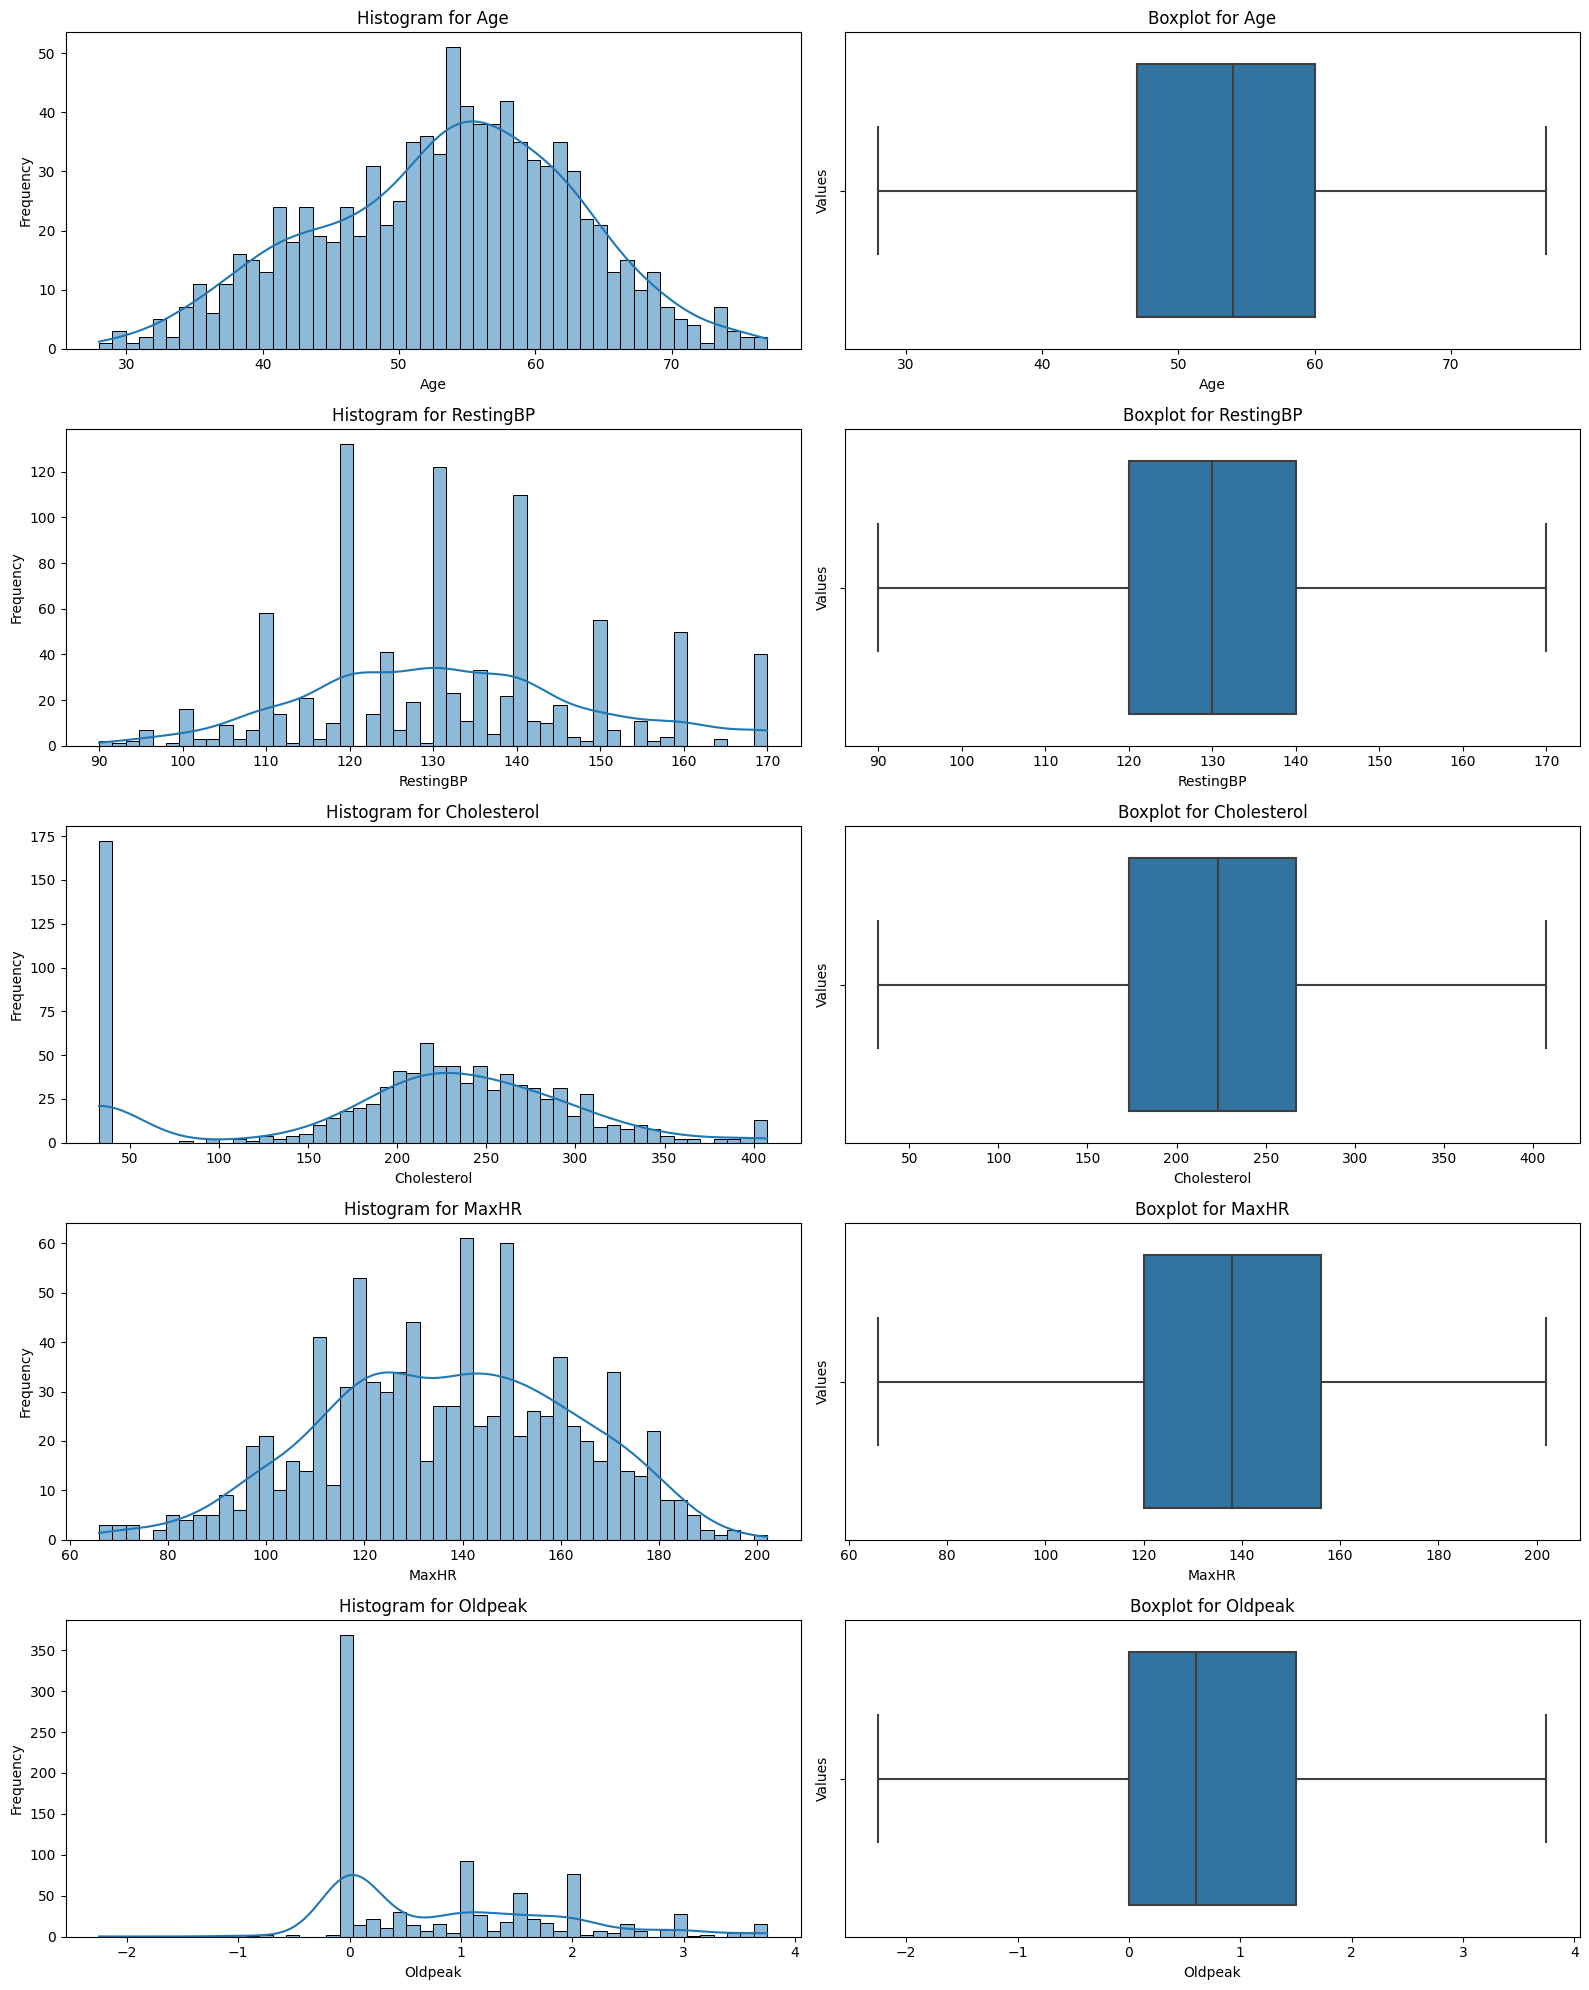

In [13]:
df_num1 = df[[obj for obj in df.select_dtypes(exclude=['object']).columns 
             if obj != 'HeartDisease' and obj != 'FastingBS' ]]
df_num1


fig, axes = plt.subplots(df_num1.shape[1], 2, figsize=(16, 4 * df_num1.shape[1]))

for i, column in enumerate(df_num1.columns):
    # Histogram
    sns.histplot(x=df_num1[column], bins=50, kde=True, ax=axes[i, 0])
    axes[i, 0].set_title(f'Histogram for {column}')
    axes[i, 0].set_xlabel(column)
    axes[i, 0].set_ylabel('Frequency')

    # Boxplot
    sns.boxplot(x=df_num1[column], ax=axes[i, 1])
    axes[i, 1].set_title(f'Boxplot for {column}')
    axes[i, 1].set_xlabel(column)
    axes[i, 1].set_ylabel('Values')

fig.tight_layout()
plt.show()

In [14]:
df_encoded = pd.get_dummies(df, columns=['Sex','ChestPainType','RestingECG','ExerciseAngina','ST_Slope'], prefix='Category',dtype='int')
df_encoded

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Category_F,Category_M,Category_ASY,...,Category_NAP,Category_TA,Category_LVH,Category_Normal,Category_ST,Category_N,Category_Y,Category_Down,Category_Flat,Category_Up
0,40,140,289.0,0,172,0.0,0,0,1,0,...,0,0,0,1,0,1,0,0,0,1
1,49,160,180.0,0,156,1.0,1,1,0,0,...,1,0,0,1,0,1,0,0,1,0
2,37,130,283.0,0,98,0.0,0,0,1,0,...,0,0,0,0,1,1,0,0,0,1
3,48,138,214.0,0,108,1.5,1,1,0,1,...,0,0,0,1,0,0,1,0,1,0
4,54,150,195.0,0,122,0.0,0,0,1,0,...,1,0,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,110,264.0,0,132,1.2,1,0,1,0,...,0,1,0,1,0,1,0,0,1,0
914,68,144,193.0,1,141,3.4,1,0,1,1,...,0,0,0,1,0,1,0,0,1,0
915,57,130,131.0,0,115,1.2,1,0,1,1,...,0,0,0,1,0,0,1,0,1,0
916,57,130,236.0,0,174,0.0,1,1,0,0,...,0,0,1,0,0,1,0,0,1,0


In [15]:
df_encoded.shape

(918, 21)

In [16]:
df_corr=df_encoded.corr()
df_corr

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Category_F,Category_M,Category_ASY,...,Category_NAP,Category_TA,Category_LVH,Category_Normal,Category_ST,Category_N,Category_Y,Category_Down,Category_Flat,Category_Up
Age,1.000000,0.269950,-0.088063,0.198039,-0.382449,0.262563,0.282039,-0.055750,0.055750,0.166607,...,-0.011335,0.032042,0.145727,-0.230566,0.136798,-0.215793,0.215793,0.138397,0.185568,-0.258067
RestingBP,0.269950,1.000000,0.107313,0.065864,-0.112972,0.174454,0.113191,-0.016555,0.016555,0.045155,...,-0.032212,0.055632,0.050454,-0.115687,0.091774,-0.155341,0.155341,-0.016463,0.111007,-0.103696
Cholesterol,-0.088063,0.107313,1.000000,-0.257816,0.232736,0.054023,-0.225304,0.203929,-0.203929,-0.114099,...,-0.013576,0.015875,0.180797,-0.045158,-0.128619,0.025959,-0.025959,-0.082693,-0.050235,0.092955
FastingBS,0.198039,0.065864,-0.257816,1.000000,-0.131797,0.059230,0.267291,-0.120076,0.120076,0.131176,...,-0.039249,0.026885,-0.011656,-0.093028,0.127110,-0.060451,0.060451,0.105102,0.107006,-0.161730
MaxHR,-0.382449,-0.112972,0.232736,-0.131797,1.000000,-0.164927,-0.400519,0.189197,-0.189197,-0.355002,...,0.134524,0.100048,0.125738,0.024142,-0.158244,0.370892,-0.370892,-0.073502,-0.342834,0.383747
Oldpeak,0.262563,0.174454,0.054023,0.059230,-0.164927,1.000000,0.410211,-0.112159,0.112159,0.281977,...,-0.104849,0.033035,0.084891,-0.115397,0.056264,-0.418709,0.418709,0.307755,0.298174,-0.458263
HeartDisease,0.282039,0.113191,-0.225304,0.267291,-0.400519,0.410211,1.000000,-0.305445,0.305445,0.516716,...,-0.212964,-0.054790,0.010670,-0.091580,0.102527,-0.494282,0.494282,0.122527,0.554134,-0.622164
Category_F,-0.055750,-0.016555,0.203929,-0.120076,0.189197,-0.112159,-0.305445,1.000000,-1.000000,-0.183876,...,0.066486,0.004031,0.049518,0.010634,-0.063715,0.190664,-0.190664,-0.066036,-0.116077,0.150942
Category_M,0.055750,0.016555,-0.203929,0.120076,-0.189197,0.112159,0.305445,-1.000000,1.000000,0.183876,...,-0.066486,-0.004031,-0.049518,-0.010634,0.063715,-0.190664,0.190664,0.066036,0.116077,-0.150942
Category_ASY,0.166607,0.045155,-0.114099,0.131176,-0.355002,0.281977,0.516716,-0.183876,0.183876,1.000000,...,-0.577670,-0.249003,0.002289,-0.063606,0.076438,-0.430034,0.430034,0.103407,0.303645,-0.359443


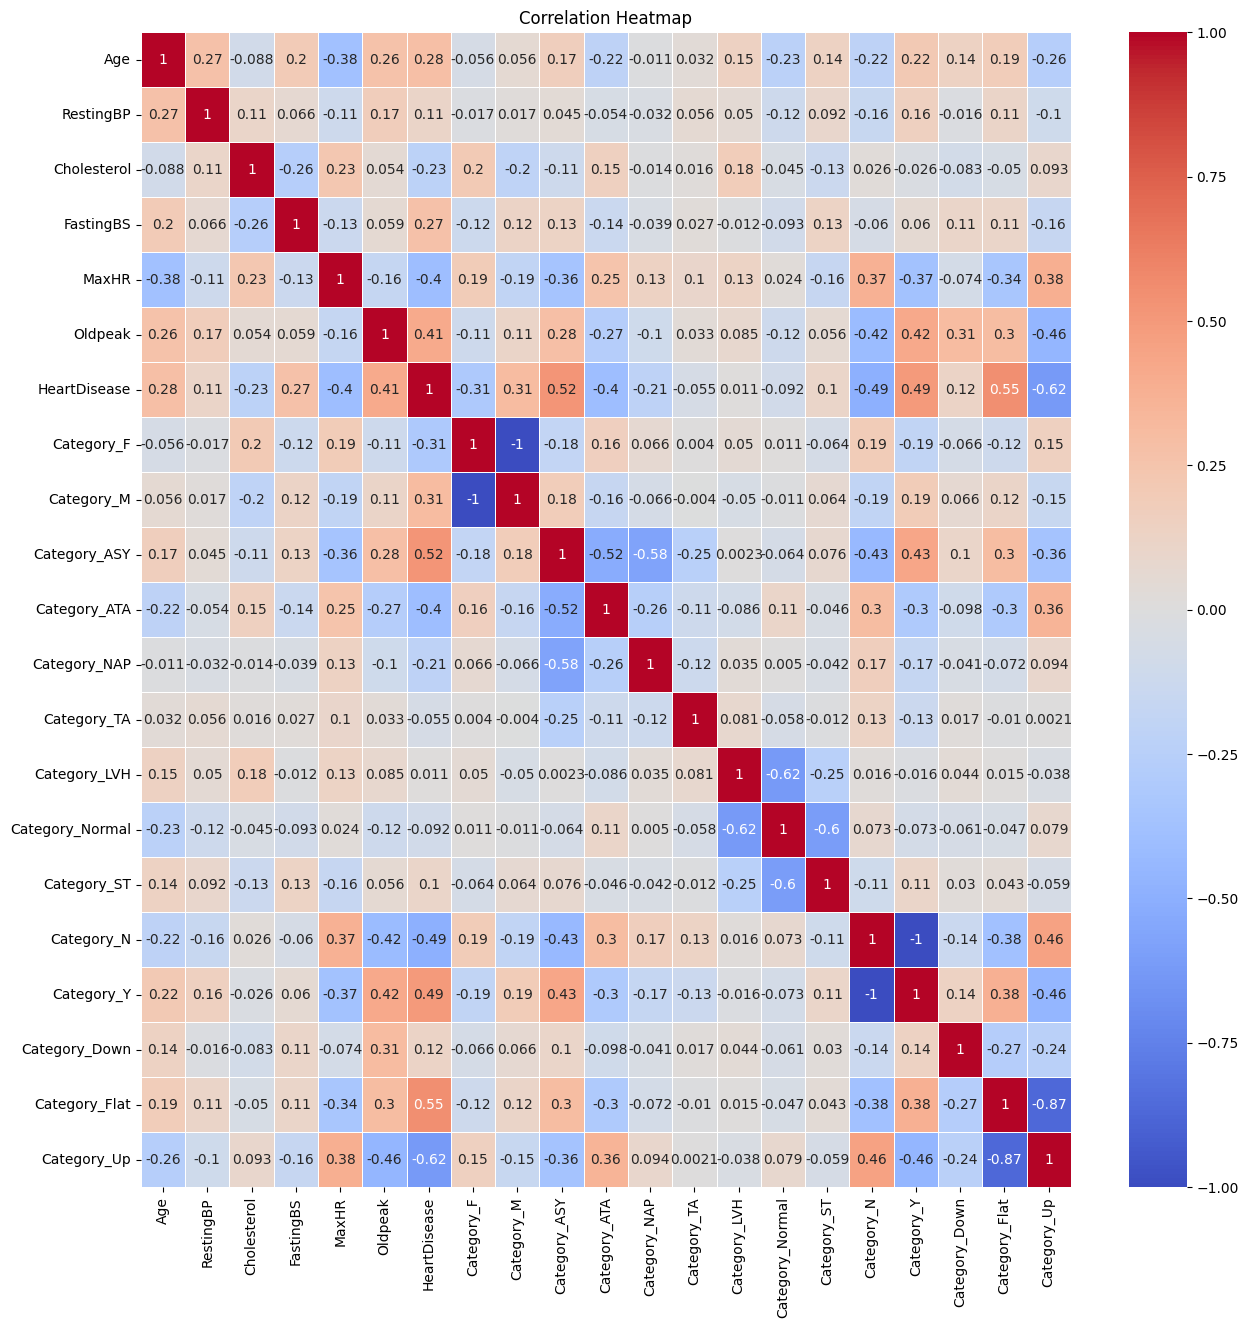

In [17]:
plt.figure(figsize=(15, 15))
sns.heatmap(df_corr, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

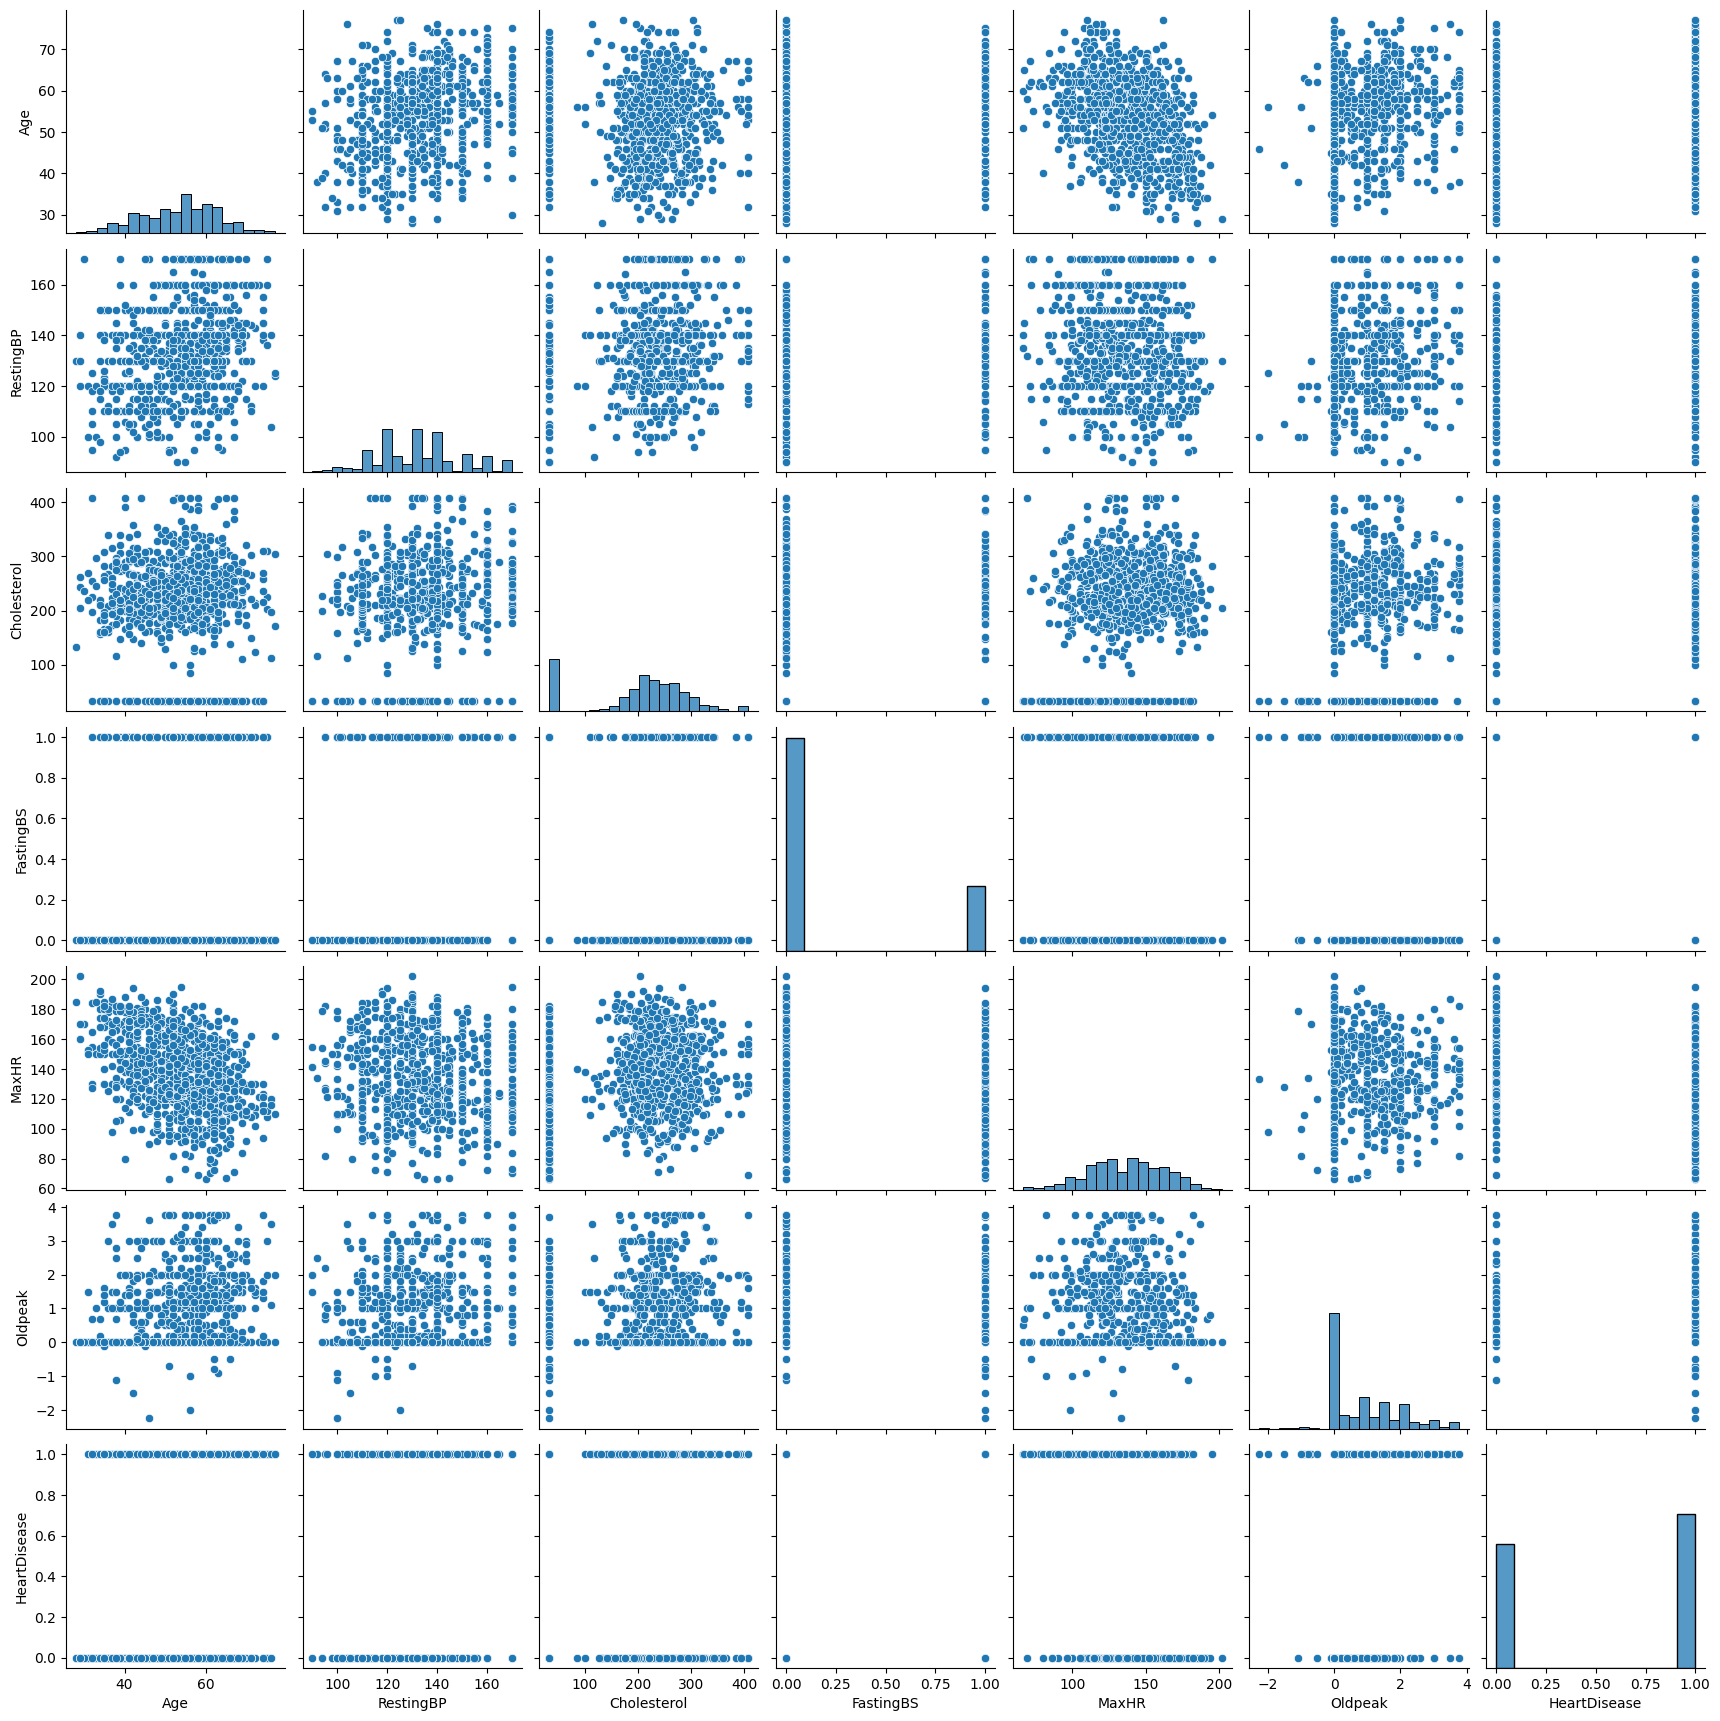

In [18]:
sns.pairplot(df)
plt.show()

In [19]:
X = df_encoded.drop('HeartDisease', axis=1)
Y = df_encoded['HeartDisease']

In [20]:
X.head(3)

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,Category_F,Category_M,Category_ASY,Category_ATA,Category_NAP,Category_TA,Category_LVH,Category_Normal,Category_ST,Category_N,Category_Y,Category_Down,Category_Flat,Category_Up
0,40,140,289.0,0,172,0.0,0,1,0,1,0,0,0,1,0,1,0,0,0,1
1,49,160,180.0,0,156,1.0,1,0,0,0,1,0,0,1,0,1,0,0,1,0
2,37,130,283.0,0,98,0.0,0,1,0,1,0,0,0,0,1,1,0,0,0,1


In [21]:
Y.head(3)

0    0
1    1
2    0
Name: HeartDisease, dtype: int64

# Logistic Regression

In [22]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y,test_size=0.3,random_state=1)
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logmodel = LogisticRegression()

In [23]:
logmodel.fit(X_train,Y_train)

LogisticRegression()

In [24]:
predictions=logmodel.predict(X_test)

In [25]:
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_test,predictions)

array([[ 98,  11],
       [ 21, 146]])

In [26]:
from sklearn.metrics import accuracy_score
accuracy_score(Y_test, predictions)

0.8840579710144928

Let's try standardization technique

In [27]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [28]:
logModelScaled = LogisticRegression()

In [29]:
logModelScaled.fit(X_train_scaled, Y_train)

LogisticRegression()

In [30]:
logModelScaled.score(X_test_scaled, Y_test)

0.8659420289855072

using GridSearchCV hypertuning

In [31]:
from sklearn.model_selection import GridSearchCV


param_grid = {
    'penalty': ['l1', 'l2'],
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'saga']
}

grid_search = GridSearchCV(estimator=logModelScaled, param_grid=param_grid, scoring='accuracy', cv=5)
grid_search.fit(X_train_scaled, Y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'penalty': ['l1', 'l2'],
                         'solver': ['liblinear', 'saga']},
             scoring='accuracy')

In [32]:
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

Best Parameters: {'C': 0.01, 'penalty': 'l2', 'solver': 'saga'}


In [33]:
best_model= grid_search.best_estimator_
best_model.fit(X_train_scaled, Y_train)

LogisticRegression(C=0.01, solver='saga')

In [34]:
def print_accuracy (x_train, y_train, x_test, y_test, model):
    
    y_pred_test=model.predict(x_test)
    accuracy_test= accuracy_score(y_test, y_pred_test)
    print(f"Accuracy test: {round(accuracy_test * 100,2)}%")

    y_pred_train= model.predict(x_train)
    accuracy_train= accuracy_score(y_train, y_pred_train)
    print(f"Accuracy train: {round(accuracy_train* 100,2)}%")

In [35]:
print_accuracy (X_train_scaled, Y_train, X_test_scaled, Y_test, best_model)

Accuracy test: 88.04%
Accuracy train: 86.29%


In [36]:

def conf_matrix_graph(X_Test,Y_test, model):
    y_predict = model.predict(X_Test)
    conf_matrix = confusion_matrix(Y_test,y_predict)
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Reds')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix ')
    plt.show()
    print()
    print()
    print("===============Classification Report===============")
    print()
    print()
    print(classification_report(Y_test, y_predict, digits=3))

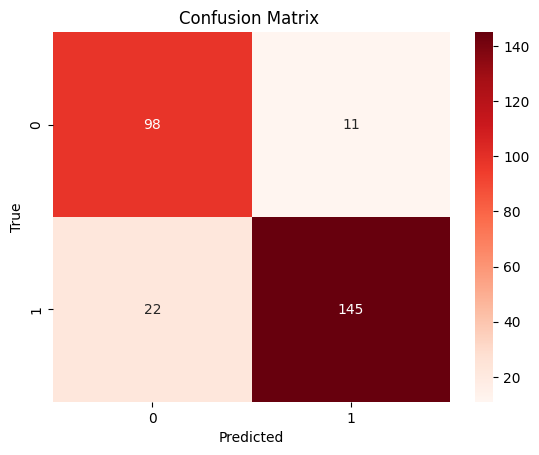



===============Classification Report===============


              precision    recall  f1-score   support

           0      0.817     0.899     0.856       109
           1      0.929     0.868     0.898       167

    accuracy                          0.880       276
   macro avg      0.873     0.884     0.877       276
weighted avg      0.885     0.880     0.881       276



In [37]:
conf_matrix_graph(X_test_scaled,Y_test, best_model)

# Decision Tree

In [38]:
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, Y_train)

DecisionTreeClassifier()

In [39]:
dt_model.score(X_train, Y_train)

1.0

In [40]:
dt_model.score(X_test, Y_test)

0.7681159420289855

In [41]:
path = dt_model.cost_complexity_pruning_path(X_train, Y_train)
path
ccp_alpha = path.ccp_alphas
ccp_alpha

array([0.        , 0.00121872, 0.00123186, 0.00124611, 0.00129803,
       0.00138456, 0.00138456, 0.00140187, 0.00144637, 0.00145379,
       0.00145379, 0.00146601, 0.00148305, 0.00149533, 0.00151578,
       0.00178015, 0.00188754, 0.00201391, 0.00207684, 0.00207684,
       0.00207684, 0.00233645, 0.00234017, 0.00237354, 0.00242298,
       0.00249221, 0.00259605, 0.00265949, 0.00267023, 0.002756  ,
       0.00280374, 0.00290042, 0.00291297, 0.0029626 , 0.00348096,
       0.00376068, 0.00380755, 0.00459365, 0.00460081, 0.00484044,
       0.00536433, 0.00595985, 0.00697819, 0.00726981, 0.00789747,
       0.00962244, 0.01402088, 0.0188805 , 0.04559316, 0.18637791])

In [42]:
dt_model2 = []
for ccp in ccp_alpha:
    dt_m  = DecisionTreeClassifier(ccp_alpha=ccp)
    dt_m.fit(X_train,Y_train)
    dt_model2.append(dt_m)

In [43]:
dt_model2

[DecisionTreeClassifier(),
 DecisionTreeClassifier(ccp_alpha=0.0012187189757283214),
 DecisionTreeClassifier(ccp_alpha=0.0012318647085002247),
 DecisionTreeClassifier(ccp_alpha=0.0012461059190031149),
 DecisionTreeClassifier(ccp_alpha=0.0012980269989615785),
 DecisionTreeClassifier(ccp_alpha=0.0013845621322256835),
 DecisionTreeClassifier(ccp_alpha=0.0013845621322256835),
 DecisionTreeClassifier(ccp_alpha=0.001401869158878505),
 DecisionTreeClassifier(ccp_alpha=0.001446372941700045),
 DecisionTreeClassifier(ccp_alpha=0.0014537902388369682),
 DecisionTreeClassifier(ccp_alpha=0.0014537902388369682),
 DecisionTreeClassifier(ccp_alpha=0.001466006963533077),
 DecisionTreeClassifier(ccp_alpha=0.0014830518835859297),
 DecisionTreeClassifier(ccp_alpha=0.0014953271028037378),
 DecisionTreeClassifier(ccp_alpha=0.0015157840902664593),
 DecisionTreeClassifier(ccp_alpha=0.0017801513128615934),
 DecisionTreeClassifier(ccp_alpha=0.0018875371649709808),
 DecisionTreeClassifier(ccp_alpha=0.002013908555

Text(0, 0.5, 'score')

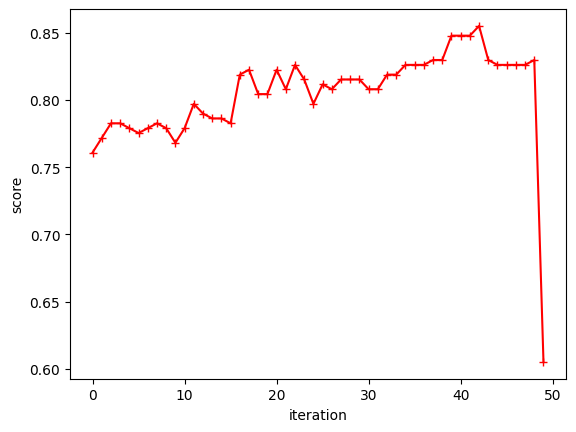

In [44]:
dt_model2 = []
score = []
for i in ccp_alpha:
    dt_m = DecisionTreeClassifier(ccp_alpha = i)
    dt_m.fit(X_train,Y_train)
    dt_model2.append(dt_m)
    score.append(dt_m.score(X_test, Y_test))

    
plt.plot(score, 'r-+')
plt.xlabel('iteration')
plt.ylabel('score')

In [45]:
train_score = [i.score(X_train,Y_train) for i in dt_model2]
test_score = [i.score(X_test ,Y_test) for i in dt_model2]

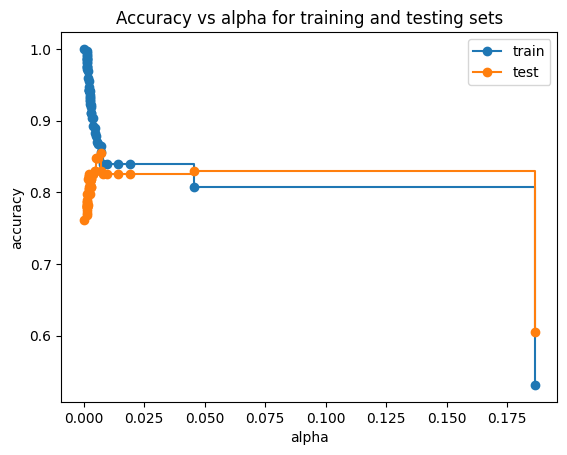

In [46]:
fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alpha, train_score, marker='o', label="train",
        drawstyle="steps-post")
ax.plot(ccp_alpha, test_score, marker='o', label="test",
        drawstyle="steps-post")
ax.legend()
plt.show()

In [47]:
dt_with_ccp = DecisionTreeClassifier(random_state=0, ccp_alpha=0.007897469530524122)
dt_with_ccp.fit(X_train, Y_train)

DecisionTreeClassifier(ccp_alpha=0.007897469530524122, random_state=0)

In [48]:
print_accuracy(X_test,Y_test, X_train,Y_train,dt_with_ccp)

Accuracy test: 83.96%
Accuracy train: 82.61%


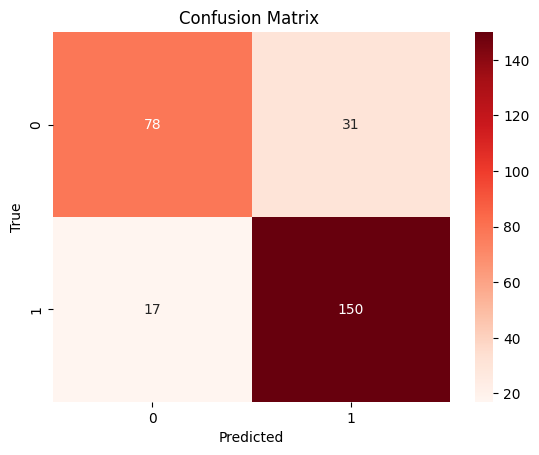



===============Classification Report===============


              precision    recall  f1-score   support

           0      0.821     0.716     0.765       109
           1      0.829     0.898     0.862       167

    accuracy                          0.826       276
   macro avg      0.825     0.807     0.813       276
weighted avg      0.826     0.826     0.824       276



In [49]:
conf_matrix_graph(X_test, Y_test, dt_with_ccp)

# RandomForest

In [50]:
rf = RandomForestClassifier(n_jobs=2, random_state=0)
rf.fit(X_train, Y_train)

RandomForestClassifier(n_jobs=2, random_state=0)

In [51]:
print_accuracy(X_train,Y_train, X_test, Y_test,rf)

Accuracy test: 88.77%
Accuracy train: 100.0%


In [52]:
rf1 = RandomForestClassifier(n_jobs=2, random_state=0)

In [53]:
rf1.fit(X_train_scaled,Y_train)

RandomForestClassifier(n_jobs=2, random_state=0)

In [54]:
print_accuracy(X_train_scaled,Y_train, X_test_scaled, Y_test,rf1)

Accuracy test: 88.04%
Accuracy train: 100.0%


### Using GridSearchCV

In [55]:
param_grid = [
{'n_estimators': [10, 25], 'max_features': [5, 10], 
 'max_depth': [10, 50, None], 'bootstrap': [True, False]}
]

grid_search_forest = GridSearchCV(rf1, param_grid, cv=10, scoring='neg_mean_squared_error')
grid_search_forest.fit(X_train_scaled, Y_train)

GridSearchCV(cv=10, estimator=RandomForestClassifier(n_jobs=2, random_state=0),
             param_grid=[{'bootstrap': [True, False],
                          'max_depth': [10, 50, None], 'max_features': [5, 10],
                          'n_estimators': [10, 25]}],
             scoring='neg_mean_squared_error')

In [56]:
cvres = grid_search_forest.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

0.40436322209693526 {'bootstrap': True, 'max_depth': 10, 'max_features': 5, 'n_estimators': 10}
0.408267917313732 {'bootstrap': True, 'max_depth': 10, 'max_features': 5, 'n_estimators': 25}
0.41763988904686405 {'bootstrap': True, 'max_depth': 10, 'max_features': 10, 'n_estimators': 10}
0.3926610399666515 {'bootstrap': True, 'max_depth': 10, 'max_features': 10, 'n_estimators': 25}
0.4249151499009945 {'bootstrap': True, 'max_depth': 50, 'max_features': 5, 'n_estimators': 10}
0.40039043445117417 {'bootstrap': True, 'max_depth': 50, 'max_features': 5, 'n_estimators': 25}
0.408267917313732 {'bootstrap': True, 'max_depth': 50, 'max_features': 10, 'n_estimators': 10}
0.3946151971809422 {'bootstrap': True, 'max_depth': 50, 'max_features': 10, 'n_estimators': 25}
0.4249151499009945 {'bootstrap': True, 'max_depth': None, 'max_features': 5, 'n_estimators': 10}
0.40039043445117417 {'bootstrap': True, 'max_depth': None, 'max_features': 5, 'n_estimators': 25}
0.408267917313732 {'bootstrap': True, 'm

In [57]:
grid_search_forest.best_estimator_

RandomForestClassifier(max_depth=10, max_features=10, n_estimators=25, n_jobs=2,
                       random_state=0)

In [58]:
best_model=grid_search_forest.best_estimator_
rf_pred_gsc = best_model.predict(X_test_scaled)


In [59]:
print_accuracy(X_train_scaled,Y_train, X_test_scaled, Y_test,best_model)

Accuracy test: 85.51%
Accuracy train: 99.22%


### K-foldCV and cross validation

In [60]:
from sklearn.model_selection import cross_val_score

rf_kfoldcv = RandomForestClassifier(n_estimators=100, random_state=42)
cv_scores = cross_val_score(rf_kfoldcv, X, Y, cv=5, scoring='accuracy')
print("Cross-Validation Scores:", cv_scores)
print("Mean Accuracy:", cv_scores.mean())

Cross-Validation Scores: [0.89130435 0.82608696 0.82608696 0.83060109 0.7704918 ]
Mean Accuracy: 0.8289142314088858


In [61]:
final_rf_model = RandomForestClassifier(n_estimators=200, random_state=42)
final_rf_model.fit(X_train_scaled, Y_train)

RandomForestClassifier(n_estimators=200, random_state=42)

In [62]:
final_rf_model.score(X_test_scaled,Y_test)

0.8804347826086957

In [63]:
print_accuracy(X_train_scaled, Y_train, X_test_scaled, Y_test, final_rf_model)

Accuracy test: 88.04%
Accuracy train: 100.0%


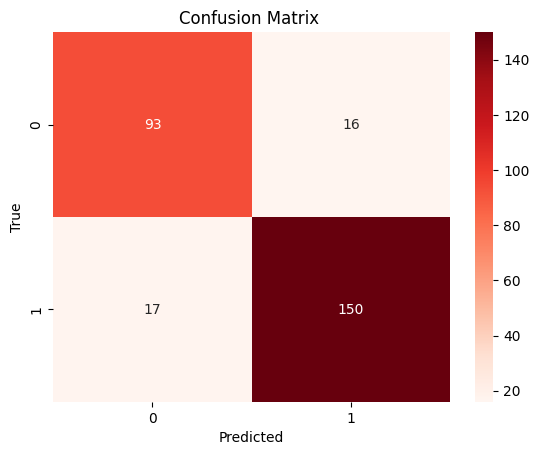



===============Classification Report===============


              precision    recall  f1-score   support

           0      0.845     0.853     0.849       109
           1      0.904     0.898     0.901       167

    accuracy                          0.880       276
   macro avg      0.875     0.876     0.875       276
weighted avg      0.881     0.880     0.881       276



In [64]:
conf_matrix_graph(X_test_scaled,Y_test, final_rf_model)

In [65]:
from sklearn.model_selection import StratifiedKFold

In [66]:
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cnt = 1


# split()  method generate indices to split data into training and test set.
for train_index, test_index in kf.split(X, Y):
    print(f'Fold:{cnt}, Train set: {len(train_index)}, Test set:{len(test_index)}')
    cnt+=1


Fold:1, Train set: 734, Test set:184
Fold:2, Train set: 734, Test set:184
Fold:3, Train set: 734, Test set:184
Fold:4, Train set: 735, Test set:183
Fold:5, Train set: 735, Test set:183


In [67]:
score = cross_val_score(ensemble.RandomForestClassifier(random_state= 42), X, Y, cv= kf, scoring="accuracy")
print(f'Scores for each fold are: {score}')
print(f'Average score: {"{:.2f}".format(score.mean())}')

Scores for each fold are: [0.90217391 0.875      0.83152174 0.8852459  0.80874317]
Average score: 0.86


### RandomizedSearchCv

In [68]:
from sklearn.model_selection import RandomizedSearchCV

rsc = RandomForestClassifier()
param_dist = {
    'n_estimators': [10, 50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'max_features': ['auto', 'sqrt', 'log2'],
    'bootstrap': [True, False]
}

# Create RandomizedSearchCV object
random_search = RandomizedSearchCV(
    estimator=rsc,
    param_distributions=param_dist,
    n_iter=10,  # Number of parameter settings that are sampled
    cv=5,      # Number of cross-validation folds
    scoring='accuracy',
    random_state=42
)

random_search.fit(X_train_scaled, Y_train)
best_params = random_search.best_params_
best_model = random_search.best_estimator_

# Print the best hyperparameters
print("Best Hyperparameters:", best_params)

Best Hyperparameters: {'n_estimators': 100, 'max_features': 'sqrt', 'max_depth': 30, 'bootstrap': True}


In [69]:
y_pred=best_model.predict(X_test_scaled)
acc = accuracy_score(Y_test,y_pred)
acc

0.8913043478260869

In [70]:
confusion_matrix(Y_test, y_pred)

array([[ 96,  13],
       [ 17, 150]])

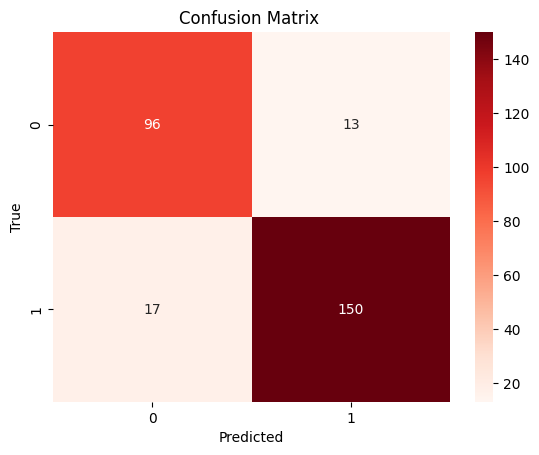



===============Classification Report===============


              precision    recall  f1-score   support

           0      0.850     0.881     0.865       109
           1      0.920     0.898     0.909       167

    accuracy                          0.891       276
   macro avg      0.885     0.889     0.887       276
weighted avg      0.892     0.891     0.892       276



In [71]:
conf_matrix_graph(X_test_scaled,Y_test, best_model)

# KNN 

In [72]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import scale
from sklearn import metrics as sm
from sklearn.metrics import classification_report, precision_score

In [73]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_scaled, Y_train)

KNeighborsClassifier(n_neighbors=3)

In [74]:
knn.predict(X_test_scaled)

array([1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0])

In [75]:
print_accuracy(X_train_scaled, Y_train, X_test_scaled, Y_test, knn)

Accuracy test: 85.51%
Accuracy train: 90.03%


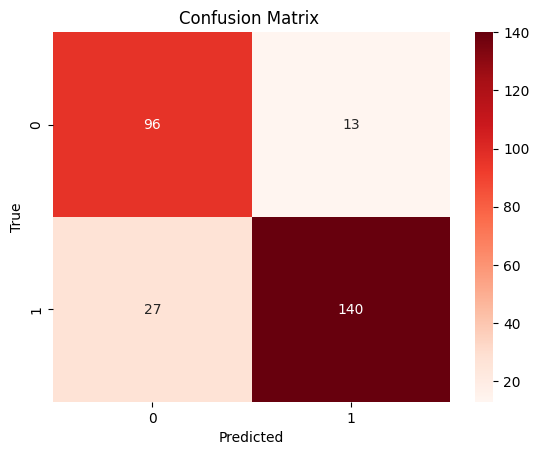



===============Classification Report===============


              precision    recall  f1-score   support

           0      0.780     0.881     0.828       109
           1      0.915     0.838     0.875       167

    accuracy                          0.855       276
   macro avg      0.848     0.860     0.851       276
weighted avg      0.862     0.855     0.856       276



In [76]:
conf_matrix_graph(X_test_scaled,Y_test,knn)

In [77]:

# Define the parameter grid with different values of k 
param_grid = {'n_neighbors': [1, 3, 5, 7, 9]} 
# Create KNN classifier 
knn_classifier = KNeighborsClassifier() 
# Perform grid search with cross-validation
grid_search = GridSearchCV(knn_classifier, param_grid, cv=5, scoring='accuracy') 
grid_search.fit(X_train_scaled, Y_train) 
# Get the best value of k 
best_k = grid_search.best_params_['n_neighbors'] 
print("Best value of k:", best_k)

Best value of k: 5


In [78]:
best_model_knn= grid_search.best_estimator_
best_model_knn.fit(X_train_scaled, Y_train)

KNeighborsClassifier()

In [79]:
print_accuracy(X_train_scaled, Y_train, X_test_scaled, Y_test, best_model_knn)

Accuracy test: 85.87%
Accuracy train: 88.79%


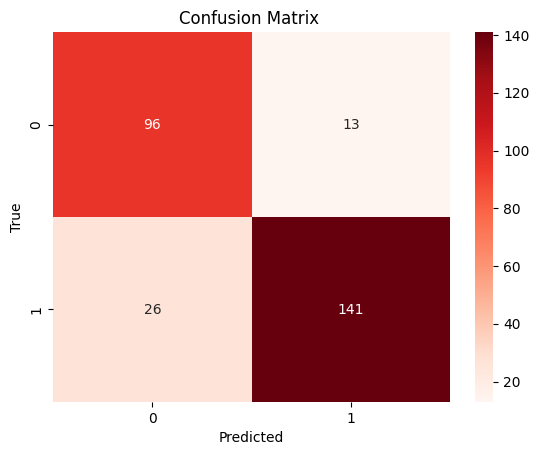



===============Classification Report===============


              precision    recall  f1-score   support

           0      0.787     0.881     0.831       109
           1      0.916     0.844     0.879       167

    accuracy                          0.859       276
   macro avg      0.851     0.863     0.855       276
weighted avg      0.865     0.859     0.860       276



In [80]:
conf_matrix_graph(X_test_scaled, Y_test, best_model_knn)

# SVM

In [81]:
svc = SVC(random_state=42, kernel='rbf')
svc.fit(X_train_scaled, Y_train)

SVC(random_state=42)

In [82]:
print_accuracy(X_train_scaled, Y_train, X_test_scaled, Y_test, svc)

Accuracy test: 88.77%
Accuracy train: 91.12%


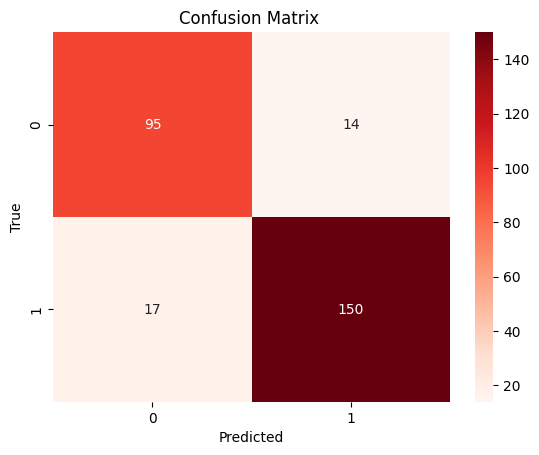



===============Classification Report===============


              precision    recall  f1-score   support

           0      0.848     0.872     0.860       109
           1      0.915     0.898     0.906       167

    accuracy                          0.888       276
   macro avg      0.881     0.885     0.883       276
weighted avg      0.888     0.888     0.888       276



In [83]:
conf_matrix_graph(X_test_scaled, Y_test, svc)

# XGBoost

In [86]:
xgb= XGBClassifier(random_state=42)
xgb.fit(X_train_scaled, Y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [87]:
print_accuracy(X_train_scaled, Y_train, X_test_scaled, Y_test, xgb)

Accuracy test: 67.03%
Accuracy train: 100.0%


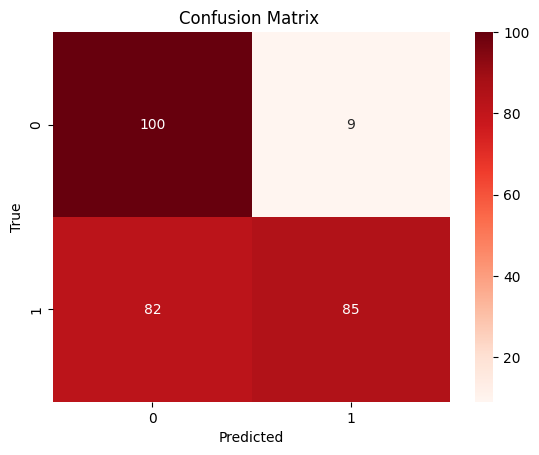



===============Classification Report===============


              precision    recall  f1-score   support

           0      0.549     0.917     0.687       109
           1      0.904     0.509     0.651       167

    accuracy                          0.670       276
   macro avg      0.727     0.713     0.669       276
weighted avg      0.764     0.670     0.666       276



In [88]:
conf_matrix_graph(X_test_scaled, Y_test, xgb)

# Naive Bayes

In [90]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, Y_train)

GaussianNB()

In [91]:
print_accuracy(X_train_scaled, Y_train, X_test_scaled, Y_test, gnb)

Accuracy test: 82.61%
Accuracy train: 79.91%


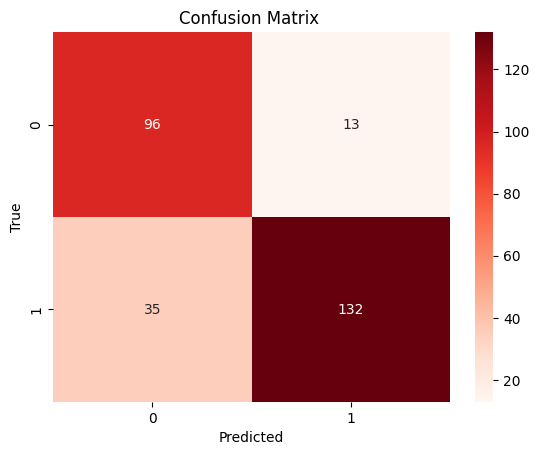



===============Classification Report===============


              precision    recall  f1-score   support

           0      0.733     0.881     0.800       109
           1      0.910     0.790     0.846       167

    accuracy                          0.826       276
   macro avg      0.822     0.836     0.823       276
weighted avg      0.840     0.826     0.828       276



In [92]:
conf_matrix_graph(X_test_scaled, Y_test, gnb)